<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 397 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


In [1]:
import pandas as pd
import numpy as np
# Load the data
auto = pd.read_csv('Auto.csv')
print(auto.info())
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
nb_null = auto.isnull().sum()
print(nb_null)

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
dtype: int64


<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
null_data = auto[auto.isnull().any(axis=1)]
print(null_data)
print("\n")
a = null_data.loc[:,"horsepower"]
print(a)
print(a[32])
print(type(a[32]))
# Comment (One - two sentence)
print("\nThe only data missing are all in the horsepower column, maybe the data where not needed for homlogation or \n were not disclose by the manufacturer for competition reason")

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
32   25.0          4          98.0         NaN    2046          19.0    71   
126  21.0          6         200.0         NaN    2875          17.0    74   
330  40.9          4          85.0         NaN    1835          17.3    80   
336  23.6          4         140.0         NaN    2905          14.3    80   
354  34.5          4         100.0         NaN    2320          15.8    81   

     origin  
32        1  
126       1  
330       2  
336       1  
354       2  


32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
Name: horsepower, dtype: float64
nan
<class 'numpy.float64'>

The only data missing are all in the horsepower column, maybe the data where not needed for homlogation or 
 were not disclose by the manufacturer for competition reason


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
median_hp = auto.loc[:,"horsepower"].median()
print(median_hp)
# Comment (one sentence):
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
auto.fillna(median_hp, inplace=True)
nb_null = auto.isnull().sum()
print(nb_null)
# 
print("As only the horsepower value is missing, this is an acceptable measure, a more refined would be to do an average horsepower value per # nb of cylinders to refine the values ")

93.5
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64
As only the horsepower value is missing, this is an acceptable measure, a more refined would be to do an average horsepower value per # nb of cylinders to refine the values 


<h3>Q.4. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>

In [5]:
# Develop the model 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = auto.loc[:, auto.columns != 'mpg']
y = auto.loc[:, "mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
score = regr.score(X_train, y_train)
print(score)

y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Comment on its quality 
print("The score is acceptable")

0.8122207731306976
Mean squared error: 7.71
Variance score: 0.85
The score is acceptable


<h3>Q.5. Show histogram of engine displacement to reveal its non-normal distribution. Normalize this feature by either applying Box-Cox transformation or any normalization tool from Scikit-learn. Plot this new feature to see whether it is now normally distributed.</h3>

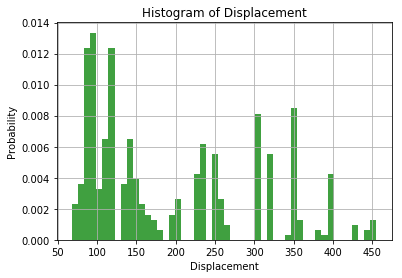

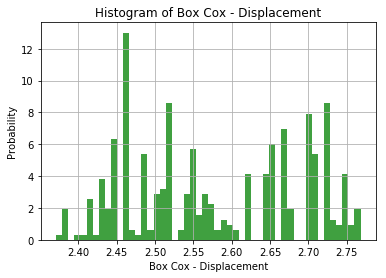

<class 'numpy.ndarray'>
True


In [6]:
from matplotlib import pyplot as plt
# Histogram of engine displacement
eng_disp = auto.loc[:, "displacement"]
bins_n = 50
n, bins, patches = plt.hist(eng_disp, bins_n, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Displacement')
plt.xlabel('Displacement')
plt.ylabel('Probability')
plt.grid(True)
plt.show()
# print(bins)

# Plot histogram of this new feature to reveal normal-like distribution
from scipy import stats
from numpy import reshape

eng_disp_t, _ = stats.boxcox(eng_disp)
n, bins, patches = plt.hist(eng_disp_t, bins_n, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Box Cox - Displacement')
plt.xlabel('Box Cox - Displacement')
plt.ylabel('Probability')
plt.grid(True)
plt.show()
# print(bins)

print(type(eng_disp_t))
print(len(eng_disp_t) == len(eng_disp))


<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [7]:
# Calculate then new model
auto = auto.loc[:, auto.columns != "displacement"].assign(displacement_cox=eng_disp_t)
print(auto.info())
auto.head()

X = auto.loc[:, auto.columns != 'mpg']
y = auto.loc[:, "mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
score = regr.score(X_train, y_train)
print(score)

y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print(type(auto))


# Comment on its performance
print("Performance is a 1% better")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg                 397 non-null float64
cylinders           397 non-null int64
horsepower          397 non-null float64
weight              397 non-null int64
acceleration        397 non-null float64
year                397 non-null int64
origin              397 non-null int64
displacement_cox    397 non-null float64
dtypes: float64(4), int64(4)
memory usage: 24.9 KB
None
0.8231061183739132
Mean squared error: 8.87
Variance score: 0.84
<class 'pandas.core.frame.DataFrame'>
Performance is a 1% better


<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [8]:
print("\nMean\n")
mean = auto.mean()
print(mean)
print("\nStandard Deviation\n")
std = auto.std()
print(std)


Mean

mpg                   23.515869
cylinders              5.458438
horsepower           104.331234
weight              2970.261965
acceleration          15.555668
year                  75.994962
origin                 1.574307
displacement_cox       2.579582
dtype: float64

Standard Deviation

mpg                   7.825804
cylinders             1.701577
horsepower           38.266994
weight              847.904119
acceleration          2.749995
year                  3.690005
origin                0.802549
displacement_cox      0.110132
dtype: float64


<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [9]:
# Center and scale
from sklearn.preprocessing import scale
auto.loc[:,:] = scale(auto)
print('\n')
print(auto.info())
print('\n')
print(auto.head())



print("\nMean\n")
mean = auto.mean()
print(mean)
print("\nStandard Deviation\n")
std = auto.std()
print(std)

# Recalculate the model



X = auto.loc[:, auto.columns != 'mpg']
y = auto.loc[:, "mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
score = regr.score(X_train, y_train)
print('\n')
print(score)

y_pred = regr.predict(X_test)

# The mean squared error
print("\nMean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('\nVariance score: %.2f' % r2_score(y_test, y_pred))


# Comment on its performance
print("Model has a score of ~ 1% better")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
mpg                 397 non-null float64
cylinders           397 non-null float64
horsepower          397 non-null float64
weight              397 non-null float64
acceleration        397 non-null float64
year                397 non-null float64
origin              397 non-null float64
displacement_cox    397 non-null float64
dtypes: float64(8)
memory usage: 24.9 KB
None


        mpg  cylinders  horsepower    weight  acceleration      year  \
0 -0.705720   1.495535    0.671627  0.630274     -1.294604 -1.626699   
1 -1.089551   1.495535    1.587408  0.853457     -1.476652 -1.626699   
2 -0.705720   1.495535    1.194930  0.549975     -1.658700 -1.626699   
3 -0.961608   1.495535    1.194930  0.546432     -1.294604 -1.626699   
4 -0.833664   1.495535    0.933279  0.565326     -1.840747 -1.626699   

     origin  displacement_cox  
0 -0.716507          1.127898  
1 -0.716507          

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
